In [1]:
import pandas as pd
import numpy as np
import os
import csv
from csv import reader
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Function to identify property of study based on filename
'''
AdsorptionDensityEquilibrium: 1-Ambrozek, 2-Toth-Narayanan 3- Toth-Ferreira 4-DA-Ferreira 5-DA Sahoo
HeatOfAdsorption: 1-Function of Uptake, 2-VantHoff (Broken)
MassTransferCoefficients: 1-Vasilev (Sahoo), 2-Knudsen (Narayan)
Permeability: 1-KozenyCarmanTortuosity Sahoo, 2-KozenyCarmanTortuosity Amigo, 3-K-C Effective Porosity,4-KozenyCarmanKozenyConstant
ThermalConductivities: 1-Sahoo, 2-MaxwellEucken, 3-ZehnderSchlunder
LocalAdsorbedGasDensity: 1-Mugele, 2-Hauer, 3-Osawa/Sahoo, 4Ambrozek
The function can be called with the following two lines: 

trial = data.columns[1]
Qeq, DelH, Gvar, Keff, keff, rhoads_t = id_inputs(trial)

'''

def id_inputs(trial):
    split = trial.split('_')
    if split[0] == '1': #AdsorptionDensityEquilibrium
        Qeq = 'Ambrozek'
    elif split[0] == '2':
        Qeq = 'Toth - Narayanan'
    elif split[0] == '3':
        Qeq = 'Toth - Ferreira'
    elif split[0] == '4':
        Qeq = 'DA - Ferreira'
    elif split[0] == '5':
        Qeq = 'DA - Sahoo'
    if split[1] == '1': #Heat of Adsoprtion
        DelH = 'Uptake Function'
    elif split[1] == '2':
        DelH = 'VH'
    if split[2] == '1': #Mass Transfer Coefficient
        Gvar = 'Vasilev'
    elif split[2] == '2':
        Gvar = 'Knudsen'
    if split[3] == '1': #Permeabilities
        Keff = 'K-C - Sahoo'
    elif split[3] == '2':
        Keff = 'K-C w/ Tc A '
    elif split[3] == '3':
        Keff = 'K-C w/ Effective Porosity'
    elif split[3] == '4':
        Keff = 'K-C w/ kozeny Constant'
    if split[4] == '1': #ThermalConductivities
        keff = 'Sahoo'
    elif split[4] == '2':
        keff = 'ME'
    elif split[4] == '3':
        keff = 'ZS'
    if split[5] == '1': #Local Adsorbed Vapor Density
        rhoads_t = "Mugele"
    if split[5] == '2':
        rhoads_t = "Hauer"
    if split[5] == '3':
        rhoads_t = "Osawa/Sahoo"
    if split[5] == '4':
        rhoads_t = "Ambrozek"
    return Qeq, DelH, Gvar, Keff, keff, rhoads_t

In [3]:
fileList = os.listdir('postanalysis') #Read files in folder into list 
for file in fileList: #Loop through list of files using file as identifier
    path = 'postanalysis/' 
    if file == fileList[0]:
        data = pd.read_csv(path+file, delimiter="\n" ,header=None) #Creates dataframe of proper length from first read data
        
        data.columns=[file[:-4]] #Creates column name from file name minus extension
    else:
        nextReadData = pd.read_csv(path+file, delimiter="\n" ,header=None)
        nextReadData.columns=[file[:-4]]
        data = pd.concat([data,nextReadData], axis=1)

#The following subtracts initial from all measurements
data.iloc[1:len(data)] = data.iloc[:len(data)] - data.iloc[0]
data.iloc[0] = data.iloc[0] - data.iloc[0]


In [4]:
chartx = []
charty = []
for i in data.columns:
    del_name = i.split("_")
    #invdt =  del_name[7] #These are assuming there is erroneous _f in file name
    #invdx = del_name[8] #These are assuming there is erroneous _f in file name
    nx_id = del_name[10]
    coldata = data[i]
    lastvalidindex = coldata.last_valid_index()
    uptake = float(coldata[lastvalidindex])
    #print(nx_id,uptake)
    charty.append(float(uptake))
    #chartx.append(float(invdx))
    chartx.append(int(nx_id))    


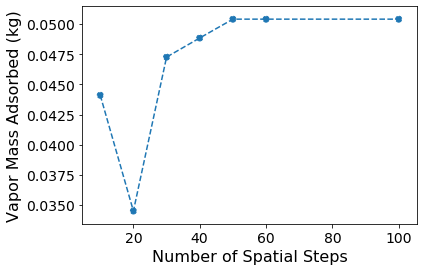

In [19]:
import matplotlib.pyplot as plt

chartx, charty = zip(*sorted(zip(chartx,charty)))

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.set_title('')
#left, bottom, width, height = [0.2, 0.25, 0.3, 0.3] #Position of inset

#ax.scatter(chartx,charty, label="Convergence")
ax.plot(chartx,charty, label="Convergence", linestyle='dashed')
ax.scatter(chartx,charty, label="Convergence", linestyle='dashed')
#ax.set_ylim([1.0e-12,30e-11])
ax.set_xlabel('Number of Spatial Steps', fontsize=16)
ax.set_ylabel('Vapor Mass Adsorbed (kg)', fontsize=16)
#plt.axvline(.3, linewidth=2, color="black")
#plt.annotate('Capillary Condensation', xy =(0.302,10))
plt.xticks(fontsize=14 )
plt.yticks(fontsize=14 )
ax.plot()
#ax.legend()   
fig.savefig('convdx.png')
plt.show()   